In [2]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [3]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_7_descriptive = get_prompt("descriptive", 7)
prompt_7_natural = get_prompt("natural", 7)

prompt_7_descriptive, prompt_7_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area).',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the simulation.')

In [4]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_7_descriptive)

Thought: Let's solve this step by step. First, let's download the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have downloaded the PDB file, let's analyze its secondary structure using DSSP.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_195130",
        "target_frames": "all"
    }
}
```

Thought: Let's continue with finding the binding and active sites for lysozyme (1LYZ). First, we need to get its UniProt ID.

Action:
```
{
    "action": "GetUniprotID",
    "action_input": "1LYZ"
}
```

Thought: Let's get all known sites (binding and active sites) for lysozyme using the UniProt ID we just obtained.

Action:
```
{
    "action": "GetAllKnownSites",
    "action_input": {
        "query": "P17897",
        "primary_accession": "P17897"
    }
}
```

Thought: Now let's set up and run a short simulation of lysozyme for 1ps at 300K.

Acti

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [6]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_195130: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_195130
 rec0_195133: dssp values for trajectory with id: 1LYZ_195130
 1LYZ_195153: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_195158: Initial positions for simulation sim0_195158
 sim0_195158: Basic Simulation of Protein 1LYZ_195153
 rec0_195202: Simulation trajectory for protein 1LYZ_195153 and simulation sim0_195158
 rec1_195202: Simulation state log for protein 1LYZ_195153 and simulation sim0_195158
 rec2_195202: Simulation pdb frames for protein 1LYZ_195153 and simulation sim0_195158


In [9]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_195130"))

In [10]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_195130", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [11]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P17897")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [12]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_195202")
top_path_1 = registry_1.get_mapped_path("top_sim0_195158")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

In [13]:
# # make sure rmsd plot was generated
# from IPython.display import Image
# Image(filename=registry_1.get_mapped_path('<rmsd_plot>'))

In [14]:
# # make sure rgy plot was generated
# from IPython.display import Image
# Image(filename=registry_1.get_mapped_path('<rgy_plot>'))

In [15]:
# # make sure sasa plot was generated
# from IPython.display import Image
# Image(filename=registry_1.get_mapped_path('<sasa_plot>'))

In [16]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_7_natural)

Thought: Let me break this down into steps:
1. First, I need to download the 1LYZ PDB file
2. Get information about binding and active sites
3. Set up and run the simulation
4. Analyze the results

Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, let's get information about binding and active sites before proceeding with the simulation.

Action:
```
{
    "action": "GetUniprotID",
    "action_input": "1LYZ"
}
```

Thought: Now that I have the UniProt ID, I can get information about binding and active sites. Let's use this ID to get all known sites.

Action:
```
{
    "action": "GetAllKnownSites",
    "action_input": {
        "query": "P17897",
        "primary_accession": "P17897"
    }
}
```

Thought: Now that I have information about the active sites, let's analyze the secondary structure of the downloaded PDB before running the simulat

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [17]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_200223: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_200223
 rec0_200235: dssp values for trajectory with id: 1LYZ_200223
 1LYZ_200245: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_200250: Initial positions for simulation sim0_200250
 sim0_200250: Basic Simulation of Protein 1LYZ_200245
 rec0_200255: Simulation trajectory for protein 1LYZ_200245 and simulation sim0_200250
 rec1_200255: Simulation state log for protein 1LYZ_200245 and simulation sim0_200250
 rec2_200255: Simulation pdb frames for protein 1LYZ_200245 and simulation sim0_200250
 rmsd_200250: RMSD for 200250
 fig0_200745: RMSD plot for 200250
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_201727: Plot of SASA over time for 1LYZ
 rgy_rec0_200255: Radii of gyration per frame for rec0_200255
 fig0_201731: Plot of radii of gyration over time for rec0_200255


In [20]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_200223"))

In [22]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_200223", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [23]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P17897")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [24]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_200255")
top_path_2 = registry_2.get_mapped_path("top_sim0_200250")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

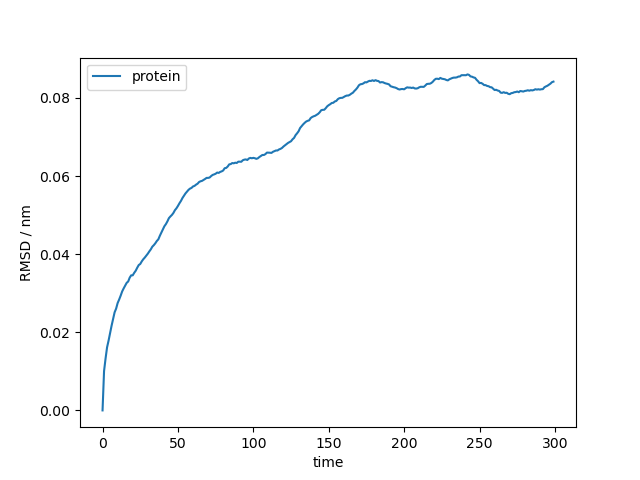

In [25]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_200745'))

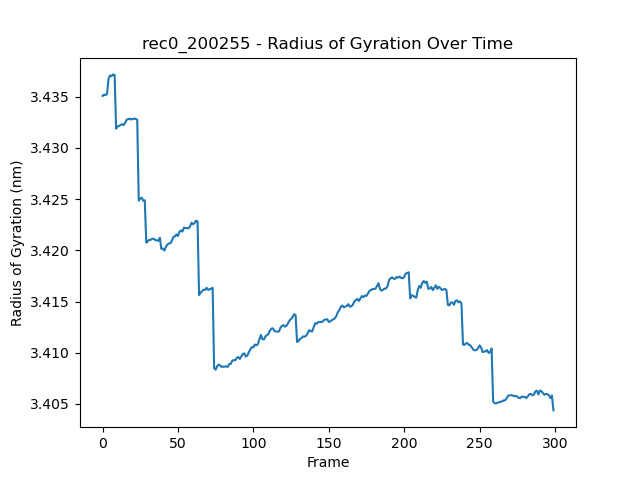

In [26]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_201731'))

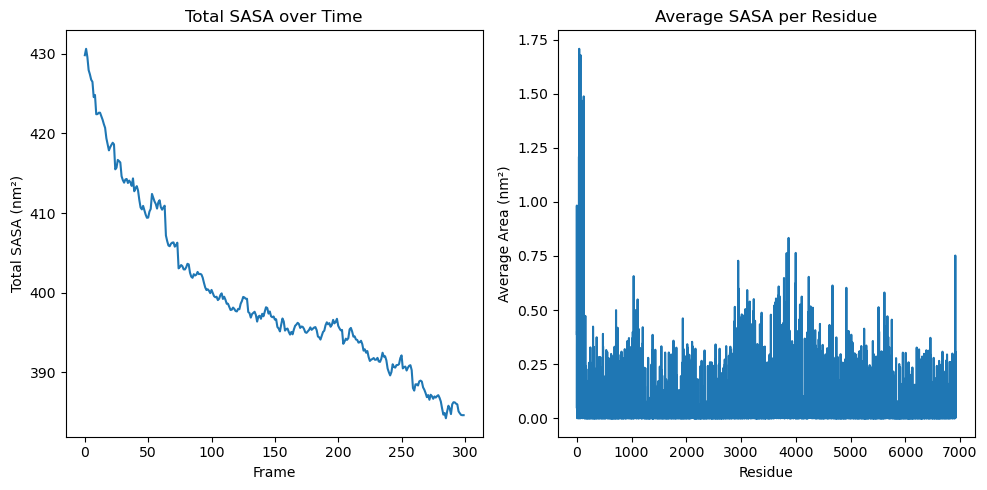

In [27]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_201727'))